In [1]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data = pd.DataFrame({
    'depth': np.random.uniform(1, 100, 100),
    'magnitude': np.random.uniform(4.0, 7.0, 100),
    'soil_type': np.random.choice([0, 1], 100),
    'latitude': np.random.uniform(-90, 90, 100),
    'longitude': np.random.uniform(-180, 180, 100),
    'risk': np.random.choice([0, 1], 100)
})
X = data.drop('risk', axis=1)
y = data['risk']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2, random_state=42)

In [2]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [3]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

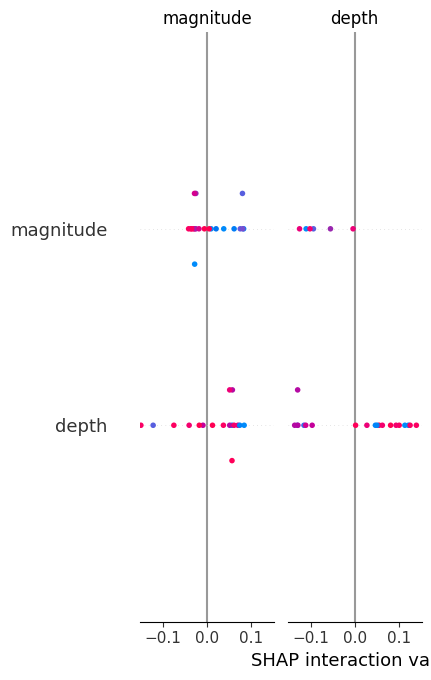

In [4]:
shap.summary_plot(shap_values, X_test)

In [8]:
import joblib
joblib.dump(model, 'random_forest_regressor_model.pkl')

['random_forest_regressor_model.pkl']

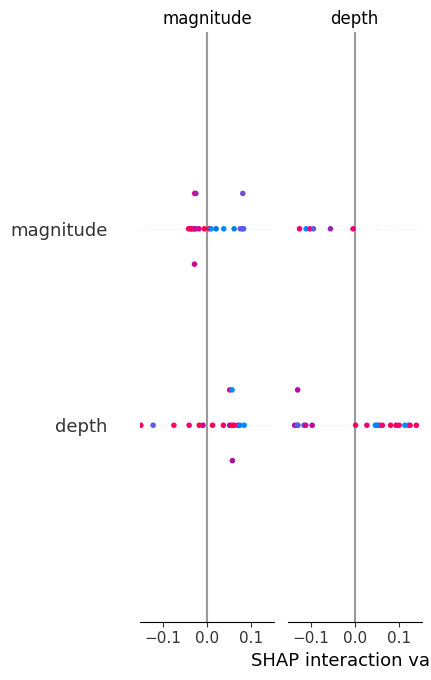

In [9]:
import joblib
import shap
try:
    loaded_model = joblib.load('random_forest_regressor_model.pkl')
    explainer_loaded = shap.TreeExplainer(loaded_model)
    shap_values_loaded = explainer_loaded.shap_values(X_test)
    shap.summary_plot(shap_values_loaded, X_test)
except FileNotFoundError:
    print("Error: Model file 'random_forest_regressor_model.pkl' not found.")
    print("Please make sure the model is saved and the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")